# Input Data Inspection/Validation and Transform

In [1]:
import os
import pandas as pd
import numpy
from datetime import datetime, timedelta
#import great_expectations as ge

## Read all csv files and concat into a dataframe.

In [2]:
# Get csv file name in ConsumptionData folder
path = "Data/ConsumptionData/"
file_list = os.listdir(path)
name_list = []
for filename in file_list:
    #print(filename)
    if filename.endswith(".csv"):
        #table_list.append(pd.read_csv(filename,sep="|"))
        name_list.append(os.path.splitext(filename)[0])
print(name_list)
len(name_list)

['NMIA3', 'NMIA2', 'NMIM1', 'NMIA1', 'NMIS3', 'NMIS2', 'NMIK4', 'NMIS1', 'NMIR1', 'NMIG1', 'NMIR2', 'NMIG2']


12

In [3]:
nmi_info = pd.read_csv("Data/nmi_info.csv")
nmi_info.head()

,Nmi,State,Interval
0,NMIM1,QLD,30.0
1,NMIS2,NSW,30.0
2,NMIS3,NSW,30.0
3,NMIA2,VIC,15.0
4,NMIA1,VIC,15.0


In [4]:
# Read CSV into Pandas Dataframe
NMIA3 = pd.read_csv(path + "NMIA3" + ".csv")
NMIA2 = pd.read_csv(path + "NMIA2" + ".csv")
NMIM1 = pd.read_csv(path + "NMIM1" + ".csv")
NMIA1 = pd.read_csv(path + "NMIA1" + ".csv")
NMIS3 = pd.read_csv(path + "NMIS3" + ".csv")
NMIS2 = pd.read_csv(path + "NMIS2" + ".csv")
NMIK4 = pd.read_csv(path + "NMIK4" + ".csv")
NMIS1 = pd.read_csv(path + "NMIS1" + ".csv")
NMIR1 = pd.read_csv(path + "NMIR1" + ".csv")
NMIG1 = pd.read_csv(path + "NMIG1" + ".csv")
NMIR2 = pd.read_csv(path + "NMIR2" + ".csv")
NMIG2 = pd.read_csv(path + "NMIG2" + ".csv")
NMIA3["Nmi"] = "NMIA3"
NMIA2["Nmi"] = "NMIA2"
NMIM1["Nmi"] = "NMIM1"
NMIA1["Nmi"] = "NMIA1"
NMIS3["Nmi"] = "NMIS3"
NMIS2["Nmi"] = "NMIS2"
NMIK4["Nmi"] = "NMIK4"
NMIS1["Nmi"] = "NMIS1"
NMIR1["Nmi"] = "NMIR1"
NMIG1["Nmi"] = "NMIG1"
NMIR2["Nmi"] = "NMIR2"
NMIG2["Nmi"] = "NMIG2"
NMIG2.head()

,AESTTime,Quantity,Unit,Nmi
0,01/10/2017 00:00:00,117.36,kWh,NMIG2
1,01/10/2017 00:30:00,114.88,kWh,NMIG2
2,01/10/2017 01:00:00,108.15,kWh,NMIG2
3,01/10/2017 01:30:00,107.75,kWh,NMIG2
4,01/10/2017 02:00:00,111.63,kWh,NMIG2


In [5]:
nmi_all = pd.concat([NMIA2,NMIM1,NMIA1,NMIS3,NMIS2,NMIK4,NMIS1,NMIR1,NMIG1,NMIR2,NMIG2,NMIA3])
nmi_all = nmi_all.reset_index(drop=True)

## Inspect Data and Unified Unit

In [6]:
# Check how many unique values in each columns
uniqueValues = nmi_all.nunique() 
print(uniqueValues)

AESTTime    52560
Quantity    38339
Unit            2
Nmi            12
dtype: int64


In [7]:
#Update all the Unit to kWh and update the Quantity value accordingly and round to two decimal.
nmi_all.loc[nmi_all["Unit"] =="Mwh",'Quantity'] = nmi_all["Quantity"] * 1000
nmi_all["Unit"] = "kWh"
nmi_all.round({"Quantity": 2})

,AESTTime,Quantity,Unit,Nmi
0,2017-10-01 00:00:00,4.52,kWh,NMIA2
1,2017-10-01 00:15:00,4.28,kWh,NMIA2
2,2017-10-01 00:30:00,4.37,kWh,NMIA2
3,2017-10-01 00:45:00,4.65,kWh,NMIA2
4,2017-10-01 01:00:00,5.10,kWh,NMIA2
...,...,...,...,...
245275,2018-09-30 21:30:00,7.33,kWh,NMIA3
245276,2018-09-30 22:00:00,7.32,kWh,NMIA3
245277,2018-09-30 22:30:00,7.38,kWh,NMIA3
245278,2018-09-30 23:00:00,7.13,kWh,NMIA3


In [8]:
# Check the null value in each column
nmi_all.isnull().sum()

AESTTime    4088
Quantity    2832
Unit           0
Nmi            0
dtype: int64

In [9]:
# conver string to datetime
nmi_all["AESTTime"] = pd.to_datetime(nmi_all["AESTTime"])

In [10]:
# Join Consumption data and nmi_info data together
nmi_all_info = pd.merge(nmi_all, nmi_info, how='left', on='Nmi')
# nmi_all_info["Year"]=pd.DatetimeIndex(nmi_all_info["AESTTime"]).year
# nmi_all_info["Year"] = nmi_all_info["Year"].astype(int)
nmi_all_info.head()
#nmi_all_info.dtypes

,AESTTime,Quantity,Unit,Nmi,State,Interval
0,2017-10-01 00:00:00,4.52,kWh,NMIA2,VIC,15.0
1,2017-10-01 00:15:00,4.28,kWh,NMIA2,VIC,15.0
2,2017-10-01 00:30:00,4.37,kWh,NMIA2,VIC,15.0
3,2017-10-01 00:45:00,4.65,kWh,NMIA2,VIC,15.0
4,2017-10-01 01:00:00,5.10,kWh,NMIA2,VIC,15.0


In [11]:
#AESTnulldf= nmi_all_info[nmi_all_info["AESTTime"].isnull()]

In [12]:

Interval = AESTnulldf["Interval"].unique()
nmi_all_info["Interval"] = nmi_all_info["Interval"].fillna(0).astype(int)
#nmi_all_info['AESTTime'] = nmi_all_info['AESTTime'] + pd.Series([datetime.timedelta(minutes=x) for x in wait_min])
for ind, row in nmi_all_info.iterrows():
    if nmi_all_info.loc[ind,"AESTTime"] is pd.NaT:
        nmi_all_info.loc[ind,"AESTTime"] = nmi_all_info.loc[ind-1,"AESTTime"] + timedelta(minutes=30)

In [13]:
# Checking dataframe, state information is missing due to NMIK4 information is missing from nmi_info.csv file
nmi_all_info.isnull().sum()

AESTTime        0
Quantity     2832
Unit            0
Nmi             0
State       17520
Interval        0
dtype: int64

## Join Consumption Data with nmi_info by merge two dataframe

## Find out the DST time period and convert AEST Time to local time

In [ ]:
# conver string to datetime
#nmi_all_info["AESTTime"] = pd.to_datetime(nmi_all_info["AESTTime"])

In [14]:
# Grab the max and min year in NMI dataframe
import datetime
start_time = nmi_all_info["AESTTime"].min()
startYear = start_time.year
finish_time = nmi_all_info["AESTTime"].max()
finishYear = finish_time.year
print(startYear)
print(finishYear)

2017
2018


In [15]:
from datetime import datetime, timedelta
# input year and month
yearMonthStart = f'{startYear}-10'
  
# getting date of first Sunday in Oct.
dst_start_time = numpy.busday_offset(yearMonthStart, 0, 
                           roll='forward', 
                           weekmask='Sun')
# input year and month
yearMonthFinish = f'{finishYear}-04'
  
# getting date of first Sunday in Apr.
dst_finish_time = numpy.busday_offset(yearMonthFinish, 0, 
                           roll='forward', 
                           weekmask='Sun')

dst_start_dt = datetime.strptime(f'{dst_start_time}  02:00:00', '%Y-%m-%d %H:%M:%S')
dst_finish_dt = datetime.strptime(f'{dst_finish_time}  03:00:00', '%Y-%m-%d %H:%M:%S')
print(dst_start_dt)
print(dst_finish_dt)

2017-10-01 02:00:00
2018-04-01 03:00:00


In [16]:
# create dataframe with NMI in VIC, NSW, and WA which need to change to local time
df_dst = nmi_all_info.loc[(nmi_all_info["State"]=="VIC") | (nmi_all_info["State"]=="NSW")]
df_dst.loc[(df_dst["AESTTime"] >= dst_start_dt)&(df_dst["AESTTime"] < dst_finish_dt),'LocalTime'] = df_dst["AESTTime"] + timedelta(hours=1)
df_wa = nmi_all_info.loc[(nmi_all_info["State"]=="WA")]
df_wa['LocalTime'] = df_wa["AESTTime"] - timedelta(hours=2)
df_qld = nmi_all_info.loc[(nmi_all_info["State"]=="QLD")]
df_qld["LocalTime"] = df_qld["AESTTime"]
#df_wa['LocalTime'] = df_dst["AESTTime"] - timedelta(hours=2)
df_dst.head()

/var/folders/18/7wy15qz12j93fy7ysg85bvdm0000gn/T/ipykernel_69167/3617268314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dst.loc[(df_dst["AESTTime"] >= dst_start_dt)&(df_dst["AESTTime"] < dst_finish_dt),'LocalTime'] = df_dst["AESTTime"] + timedelta(hours=1)
/var/folders/18/7wy15qz12j93fy7ysg85bvdm0000gn/T/ipykernel_69167/3617268314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wa['LocalTime'] = df_wa["AESTTime"] - timedelta(hours=2)
/var/folders/18/7wy15qz12j93fy7ysg85bvdm0000gn/T/ipykern

,AESTTime,Quantity,Unit,Nmi,State,Interval,LocalTime
0,2017-10-01 00:00:00,4.52,kWh,NMIA2,VIC,15,NaT
1,2017-10-01 00:15:00,4.28,kWh,NMIA2,VIC,15,NaT
2,2017-10-01 00:30:00,4.37,kWh,NMIA2,VIC,15,NaT
3,2017-10-01 00:45:00,4.65,kWh,NMIA2,VIC,15,NaT
4,2017-10-01 01:00:00,5.10,kWh,NMIA2,VIC,15,NaT


In [17]:
# Fill no time difference fild with AEST Time.
nmi_local_time = pd.concat([df_dst,df_wa,df_qld])
nmi_local_time.LocalTime.fillna(nmi_local_time.AESTTime, inplace=True)
nmi_local_time["Year"]=pd.DatetimeIndex(nmi_local_time["LocalTime"]).year
#nmi_local_time["Year"] = nmi_local_time["Year"].fillna(0).astype(int)

## Data Validation

In [18]:
import great_expectations as ge
import os
import numpy as np
import seaborn as sns
import os
import datetime
%matplotlib inline

### Read the DataSet

In [19]:
nmi_local_time.head(3)

,AESTTime,Quantity,Unit,Nmi,State,Interval,LocalTime,Year
0,2017-10-01 00:00:00,4.52,kWh,NMIA2,VIC,15,2017-10-01 00:00:00,2017
1,2017-10-01 00:15:00,4.28,kWh,NMIA2,VIC,15,2017-10-01 00:15:00,2017
2,2017-10-01 00:30:00,4.37,kWh,NMIA2,VIC,15,2017-10-01 00:30:00,2017


In [20]:
nmi_local_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227760 entries, 0 to 157679
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   AESTTime   227760 non-null  datetime64[ns]
 1   Quantity   224928 non-null  float64       
 2   Unit       227760 non-null  object        
 3   Nmi        227760 non-null  object        
 4   State      227760 non-null  object        
 5   Interval   227760 non-null  int64         
 6   LocalTime  227760 non-null  datetime64[ns]
 7   Year       227760 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 15.6+ MB


In [21]:
nmi_local_time.describe()

,Quantity,Interval,Year
count,224928.000000,227760.000000,227760.000000
mean,64.964821,25.384615,2017.747989
std,99.754000,6.923092,0.434168
min,0.000000,15.000000,2017.000000
25%,12.280000,15.000000,2017.000000
50%,19.964000,30.000000,2018.000000
75%,65.550000,30.000000,2018.000000
max,751.700000,30.000000,2018.000000


### Seperate date and time

In [22]:
nmi_local_time["LocalDate"]= nmi_local_time["LocalTime"].dt.date
nmi_local_time["LocalTime"]= nmi_local_time["LocalTime"].dt.time
nmi_local_time.head(3)

,AESTTime,Quantity,Unit,Nmi,State,Interval,LocalTime,Year,LocalDate
0,2017-10-01 00:00:00,4.52,kWh,NMIA2,VIC,15,00:00:00,2017,2017-10-01
1,2017-10-01 00:15:00,4.28,kWh,NMIA2,VIC,15,00:15:00,2017,2017-10-01
2,2017-10-01 00:30:00,4.37,kWh,NMIA2,VIC,15,00:30:00,2017,2017-10-01


### When was the highest Energy Consumption, which NMI, what time, and which year

In [23]:
nmi_local_time[nmi_local_time["Quantity"] == nmi_local_time["Quantity"].max()]
nmi_local_time[nmi_local_time["Quantity"] == nmi_local_time["Quantity"].min()]

,AESTTime,Quantity,Unit,Nmi,State,Interval,LocalTime,Year,LocalDate
106671,2017-11-02 07:30:00,0.0,kWh,NMIS2,NSW,30,08:30:00,2017,2017-11-02
112539,2018-03-04 13:30:00,0.0,kWh,NMIS2,NSW,30,14:30:00,2018,2018-03-04
112540,2018-03-04 14:00:00,0.0,kWh,NMIS2,NSW,30,15:00:00,2018,2018-03-04
112541,2018-03-04 14:30:00,0.0,kWh,NMIS2,NSW,30,15:30:00,2018,2018-03-04
112542,2018-03-04 15:00:00,0.0,kWh,NMIS2,NSW,30,16:00:00,2018,2018-03-04
112543,2018-03-04 15:30:00,0.0,kWh,NMIS2,NSW,30,16:30:00,2018,2018-03-04
203242,2018-05-08 05:00:00,0.0,kWh,NMIR2,WA,30,03:00:00,2018,2018-05-08
39159,2017-12-25 19:30:00,0.0,kWh,NMIM1,QLD,30,19:30:00,2017,2017-12-25
39160,2017-12-25 20:00:00,0.0,kWh,NMIM1,QLD,30,20:00:00,2017,2017-12-25
39161,2017-12-25 20:30:00,0.0,kWh,NMIM1,QLD,30,20:30:00,2017,2017-12-25


### Plot and Data visualization

/Users/jiana/opt/anaconda3/envs/snowflakes/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quantity', ylabel='Density'>

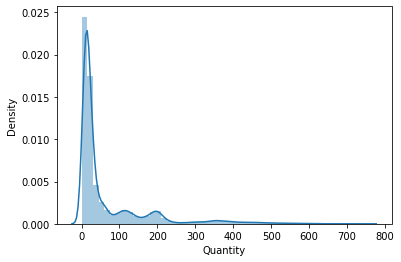

In [24]:
sns.distplot(nmi_local_time["Quantity"])

### Check how many years are unique

In [25]:
nmi_local_time["Year"].unique()

array([2017, 2018])

In [29]:
countLT = (nmi_local_time["LocalTime"] == 0).sum()
countQ = (nmi_local_time["Quantity"] == 0).sum()
print(countQ)

13


In [27]:
#nmi_local_time = nmi_local_time.loc[(nmi_local_time["Quantity"]!= 0)]

In [28]:
nmi_local_time.to_csv('NMI_Consumption.csv', index=False)

### Configureation Great Expectations_ Testing Use

In [ ]:
import great_expectations as ge
from great_expectations.cli.datasource import sanitize_yaml_and_save_datasource, check_if_datasource_name_exists
context = ge.get_context()

In [ ]:
datasource_name = "nmi_local_time"

In [ ]:
example_yaml = f"""
name: {datasource_name}
class_name: Datasource
execution_engine:
  class_name: PandasExecutionEngine
data_connectors:
  default_inferred_data_connector_name:
    class_name: InferredAssetFilesystemDataConnector
    base_directory: ..
    default_regex:
      group_names:
        - data_asset_name
      pattern: (.*)
  default_runtime_data_connector_name:
    class_name: RuntimeDataConnector
    batch_identifiers:
      - default_identifier_name
"""
print(example_yaml)

In [ ]:
context.test_yaml_config(yaml_config=example_yaml)

In [ ]:
sanitize_yaml_and_save_datasource(context, example_yaml, overwrite_existing=False)
context.list_datasources()

In [ ]:
import great_expectations as ge

print(ge.__version__)

In [ ]:
context = ge.get_context()

In [ ]:
nmi_local_time.expect_column_values_to_not_be_null("Quantity")

In [ ]:
nmi_local_time.expect_column_values_to_be_in_set('Year', ["2018"])